<a href="https://colab.research.google.com/github/rps278/Pytorch-Tutorial/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Going to create a neural network to classify the iris flowers.
We will be using the Iris dataset.
It has 4 features that we will use to classify the flowers into 1 of 3 classes

In [47]:
# Create a Model class inherited from nn.Module
class Model (nn.Module):
  # Input Layer (4 features of the flower) --->
  #  Hidden Layer 1 (number of neurons) -->
  #   H2 Layer (hidden layer 2 with neurons n) -->
  #    Output Layer (3 classes of iris flowers)
  def __init__(self,in_features=4,h1=8,h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [48]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# create an instance of the model
model = Model()

Fetch , Load and Prep the Dataset for passing into the model we created above

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
# following command so that we can do our charts within our jupyter notebooks itself
%matplotlib inline


In [50]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [51]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [52]:
my_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [53]:
# Change last column from strings to numbers
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)

In [54]:
my_df['variety'].unique()

array([0., 1., 2.])

In [55]:
# Train Test Split -  Set X and Y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [56]:
# Convert to Numpy Arrays
X = X.values
y = y.values

In [57]:
print('X Shape :', X.shape)
print('y Shape :', y.shape)

X Shape : (150, 4)
y Shape : (150,)


In [58]:
# Set Test Train Split
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

In [59]:
# Convert X features to FloatTensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [60]:
# Convert y Labels to Tensors Long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Now set the Entropy Loss Function. & set the Optimizer

In [64]:
# Set the criterion of the model to measure the error to measure how far the predictions are from the actual data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, set learning rate = lr ( if error doesnt go down after a bunch of iterations ie epochs, we probably want to lower the learning rate lr)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [65]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

TRAIN OUR MODEL

In [67]:
# Train our model
#( 1 Epoch = 1 run of all the training data through our network )
epochs = 100 #( basically spin all data through a hundred times)

# As we do that we want to see our Loss decrease over time
losses = []
for i in range(epochs):
  # Make a prediction
  y_pred = model.forward(X_train)

  # Measure the loss
  loss = criterion(y_pred,y_train) # predicted v/s y_train
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epochs: {i} and loss {loss}')

  # Do some backpropogation : Feed the error rate of the forward propogation back through the network (backwards)to fin
  # tune the weights to learn better
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epochs: 0 and loss 0.05286872386932373
Epochs: 10 and loss 0.04508009925484657
Epochs: 20 and loss 0.03979312628507614
Epochs: 30 and loss 0.03596428409218788
Epochs: 40 and loss 0.033028002828359604
Epochs: 50 and loss 0.030512504279613495
Epochs: 60 and loss 0.027733495458960533
Epochs: 70 and loss 0.02461206540465355
Epochs: 80 and loss 0.021672343835234642
Epochs: 90 and loss 0.019320344552397728


Text(0.5, 0, 'epochs (iterations)')

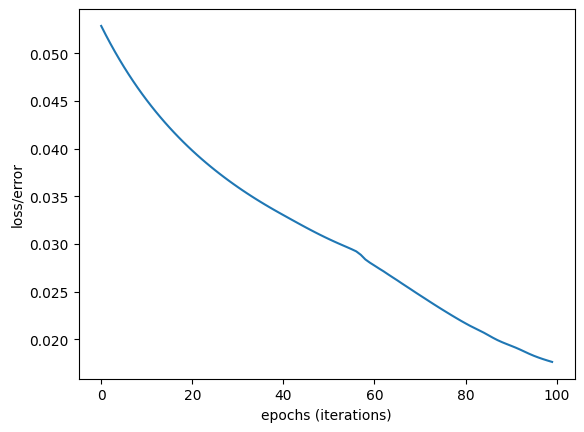

In [70]:
# Graph the Losses
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('epochs (iterations)')

TEST OUR MODEL - Model Evaluation

In [73]:
# Evaluate the model on Test dataset
with torch.no_grad():
  y_eval = model.forward(X_test)  # Pass through NN and get prediction y_eval which is a tensor
  loss = criterion(y_eval, y_test) # Find the loss or error


In [74]:
loss

tensor(0.1775)

In [86]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data) #output is a tensor
    print(f' {i+1}  \t {y_test[i]} \t {y_val.argmax().item()}  \t {str(y_val)}')

    if (y_val.argmax().item() == y_test[i]):
      correct += 1

print('Total number of correct labeling is ', correct)

 1  	 2 	 2  	 tensor([-7.0835,  3.9383,  8.7364])
 2  	 2 	 2  	 tensor([-9.8711,  1.7715, 15.9529])
 3  	 2 	 2  	 tensor([-10.8321,   3.0171,  16.0894])
 4  	 1 	 1  	 tensor([-3.9556,  7.8952, -1.1898])
 5  	 2 	 2  	 tensor([-8.9617,  3.6069, 12.2657])
 6  	 1 	 1  	 tensor([-2.1212,  8.5256, -5.1761])
 7  	 2 	 2  	 tensor([-6.8941,  4.9858,  7.1656])
 8  	 1 	 1  	 tensor([-3.8531,  8.0700, -1.5697])
 9  	 2 	 2  	 tensor([-7.9051,  4.2999,  9.6752])
 10  	 2 	 2  	 tensor([-10.5531,   1.8381,  17.0211])
 11  	 2 	 2  	 tensor([-6.5108,  5.1471,  6.3423])
 12  	 0 	 0  	 tensor([ 11.4619,   1.4091, -20.3321])
 13  	 0 	 0  	 tensor([ 10.5282,   1.2512, -18.4660])
 14  	 1 	 1  	 tensor([-0.5117,  6.7447, -5.8110])
 15  	 0 	 0  	 tensor([  9.2708,   2.4321, -17.7518])
 16  	 2 	 1  	 tensor([-6.0439,  5.7623,  4.8404])
 17  	 0 	 0  	 tensor([ 10.3116,   1.5838, -18.5374])
 18  	 1 	 2  	 tensor([-6.8871,  4.3158,  7.9685])
 19  	 0 	 0  	 tensor([ 12.2255,   1.0167, -21.1432])


You can change seed, random_state, number of ecpocs.  It can change the loss and predictions